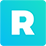

# **READING EXTERNAL DATA & PLOTTING**

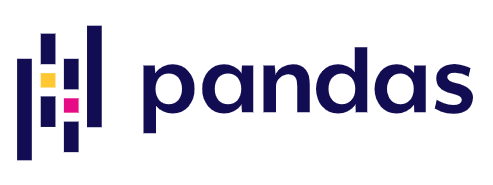

Import libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print('pandas', pd.__version__)
print('numpy', np.__version__)

pandas 1.5.3
numpy 1.25.2


# A. Read_csv

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The read_csv method reads CSV files and accepts many parameters.



## A1. Read the btc-market-price.scv

In [69]:
df = pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/btc-market-price.csv')
print(df.shape)
df.head()

(364, 2)


,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: timestamp and price. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the header parameter:

## A2. Read the data without treading the first row as column names

In [70]:
df = pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/btc-market-price.csv', header = None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


## A3. Give the column names `timestep` and `price`

We can then set the names of each column explicitely by setting the df.columns attribute:



In [71]:
df.columns = ['timestep', 'price']
print(df.shape)
df.tail()

(365, 2)


,timestep,price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [72]:
df.dtypes

timestep     object
price       float64
dtype: object

The type of the Price column was correctly interpreted as float, but the Timestamp was interpreted as a regular string (object in pandas notation)

## A4. Convert the data type from object to date

In [73]:
df['timestep'] = pd.to_datetime(df['timestep'])
df['timestep'].tail()

360   2018-03-28
361   2018-03-29
362   2018-03-30
363   2018-03-31
364   2018-04-01
Name: timestep, dtype: datetime64[ns]

In [74]:
df.dtypes

timestep    datetime64[ns]
price              float64
dtype: object

## A5. Convert the column values to index

In [75]:
df.set_index('timestep', inplace = True)
df.tail()

,price
timestep,
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667
2018-03-31,6935.480000
2018-04-01,6794.105000


## A6. Putting everything together


**There should be a better way**. And there is 😎. And there usually is, explicitly with all these repetitive tasks with pandas.

The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [76]:
df = pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/btc-market-price.csv',
            header = None,
            names = ['timestep', 'price'],
            index_col = 0,
            parse_dates = True)
print(df.dtypes)
df.tail()

price    float64
dtype: object


,price
timestep,
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667
2018-03-31,6935.480000
2018-04-01,6794.105000


# B. Plotting basics


`pandas` integrates with Matplotlib and creating a plot is as simple as:



<Axes: xlabel='timestep'>

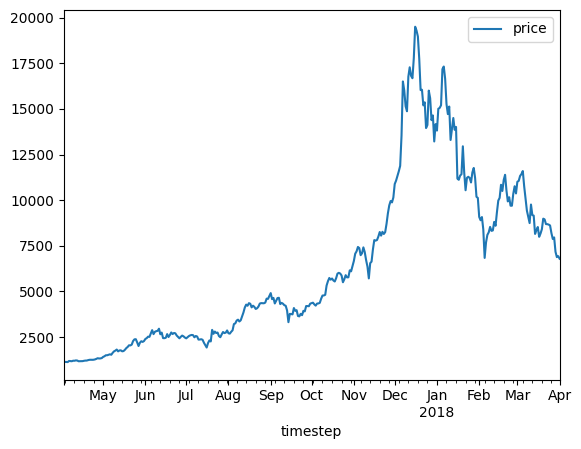

In [77]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:



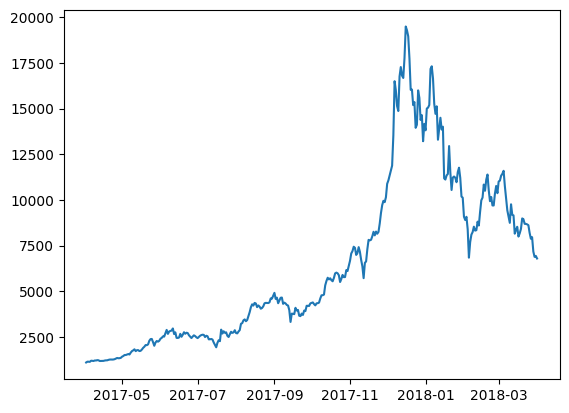

In [78]:
plt.plot(df.index, df['price'])

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [79]:
x = np.arange(-10, 11)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

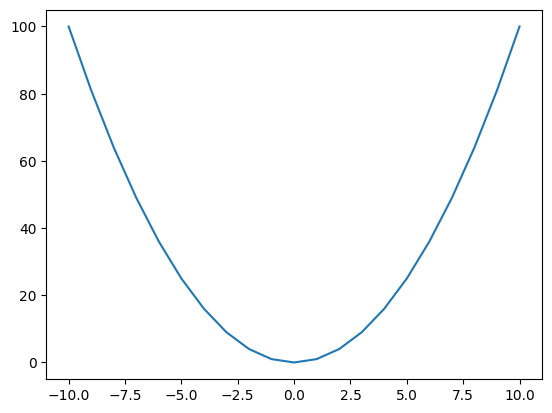

In [80]:
plt.plot(x, x**2)

We're using `matplotlib`'s global API, which is horrible but it's the most popular one. We'll learn later how to use the OOP API which will make our work much easier.



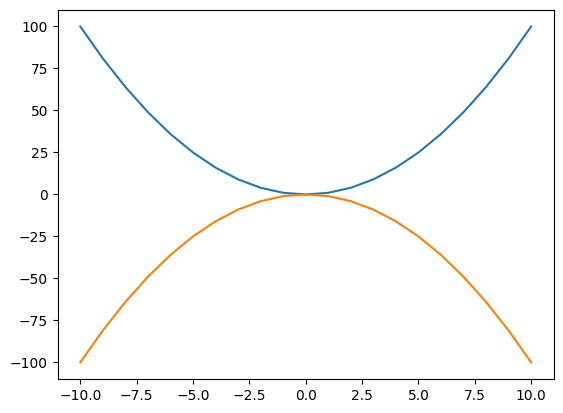

In [81]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

Text(0.5, 1.0, 'My_Nice_Plot')

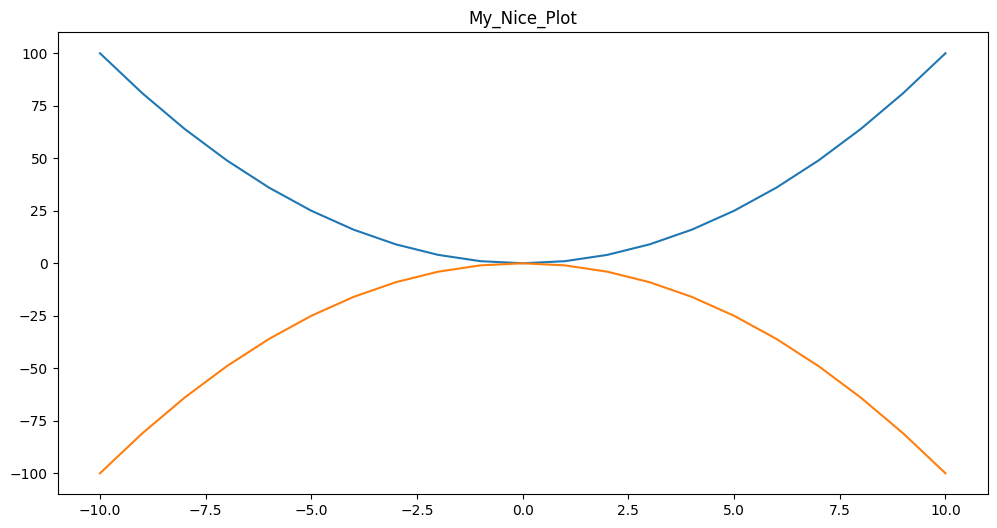

In [82]:
plt.figure(figsize = [12, 6])
plt.plot(x, x ** 2)
plt.plot(x, -1*(x ** 2))
plt.title('My_Nice_Plot')

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface:



<Axes: title={'center': 'Bitgoin Price 2017-2018'}, xlabel='timestep'>

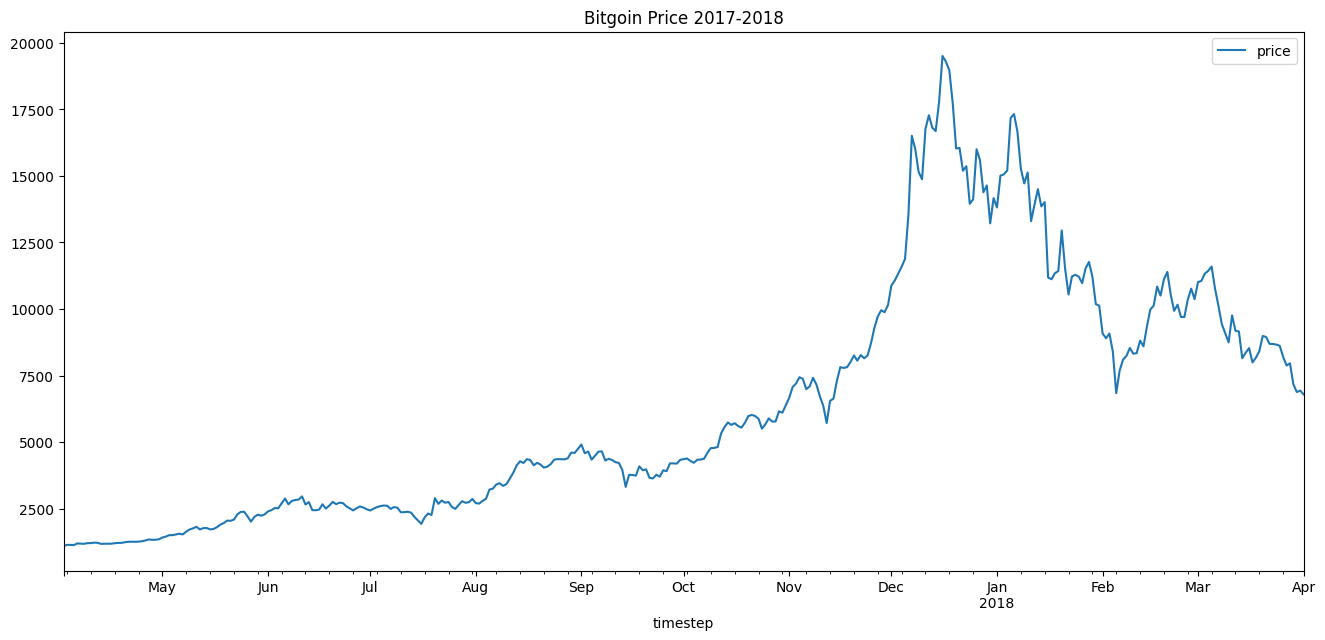

In [83]:
df.plot(figsize = [16, 7], title = 'Bitgoin Price 2017-2018')

# C. A more challenging parsing

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame. The ETH prices data can be found in the `data/eth-price.csv` file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use `pandas` to parse it.



## C1. Read the eth-price.csv

In [84]:
eth = pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/eth-price.csv')
#eth = pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/eth-price.csv',
                  #parse_dates = True)


print(eth.dtypes)
eth.tail()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
357,3/28/2018,1522195200,445.93
358,3/29/2018,1522281600,383.90
359,3/30/2018,1522368000,393.82
360,3/31/2018,1522454400,394.07
361,4/1/2018,1522540800,378.85


As you can see, it has a `Value` column (which represents the price), a `Date(UTC)` one that has a string representing dates and also a `UnixTimeStamp` date represeting the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:



## C2. Parse dates in read_csv

In [85]:
eth = pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/eth-price.csv', parse_dates = True)

print(df.dtypes)
eth.tail()

price    float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
357,3/28/2018,1522195200,445.93
358,3/29/2018,1522281600,383.90
359,3/30/2018,1522368000,393.82
360,3/31/2018,1522454400,394.07
361,4/1/2018,1522540800,378.85


Seems like the `parse_dates` attribute didn't work. We'll need to add a little bit more customization. Let's divide this problem and focus on the problem of "date parsing" first. The simplest option would be to use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically:



In [86]:
pd.to_datetime(eth['UnixTimeStamp']).tail()

357   1970-01-01 00:00:01.522195200
358   1970-01-01 00:00:01.522281600
359   1970-01-01 00:00:01.522368000
360   1970-01-01 00:00:01.522454400
361   1970-01-01 00:00:01.522540800
Name: UnixTimeStamp, dtype: datetime64[ns]

The problem is the precision of unix timestamps. To match both columns we'll need to use the same index and, our `df` containing Bitcoin prices, is "per day":



In [87]:
df.tail()

,price
timestep,
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667
2018-03-31,6935.480000
2018-04-01,6794.105000


We could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`. Let's do String parsing of `Date(UTC)` for fun:



In [88]:
pd.to_datetime(eth['Date(UTC)']).tail()

357   2018-03-28
358   2018-03-29
359   2018-03-30
360   2018-03-31
361   2018-04-01
Name: Date(UTC), dtype: datetime64[ns]

That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? Simple, the `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name:



In [89]:
pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/eth-price.csv', parse_dates = ['Date(UTC)']).tail()

,Date(UTC),UnixTimeStamp,Value
357,2018-03-28,1522195200,445.93
358,2018-03-29,1522281600,383.90
359,2018-03-30,1522368000,393.82
360,2018-03-31,1522454400,394.07
361,2018-04-01,1522540800,378.85


Putting everything together again:



In [90]:
eth = pd.read_csv('/content/drive/MyDrive/free_code_camp/Data_analysis_python/3#pandas_lesson/data/eth-price.csv', parse_dates = True, index_col = 0)
print(eth.info())

eth.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2018-03-28,1522195200,445.93
2018-03-29,1522281600,383.90
2018-03-30,1522368000,393.82
2018-03-31,1522454400,394.07
2018-04-01,1522540800,378.85


We can now combine both `DataFrames` into one. Both have the `same index`, so aligning both prices will be easy. Let's first create an `empty DataFrame` and with the index from Bitcoin prices:


## C3. Combine two DataFrame into one

In [91]:
# Create an empty DataFrame with the index from df
prices = pd.DataFrame(index = df.index)
prices.tail()

""
timestep
2018-03-28
2018-03-29
2018-03-30
2018-03-31
2018-04-01


In [92]:
# And now set columns from DataFrames
prices['bitcoin'] = df['price']
prices['ether'] = eth['Value']
prices.tail()

,bitcoin,ether
timestep,,
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82
2018-03-31,6935.480000,394.07
2018-04-01,6794.105000,378.85


We can now try plotting both values:




<Axes: xlabel='timestep'>

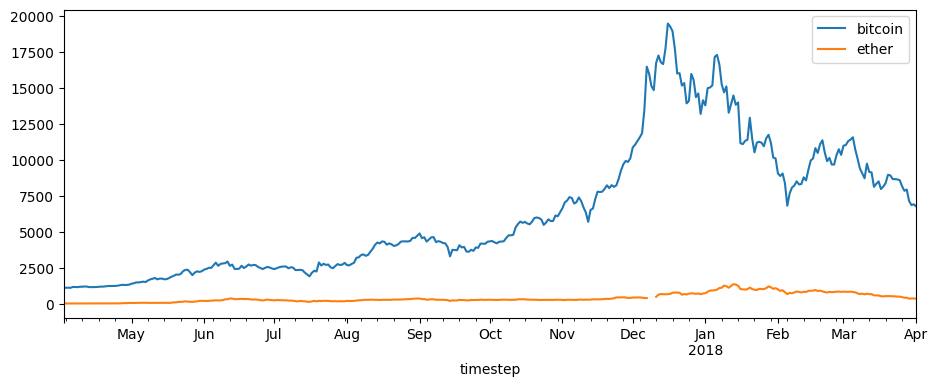

In [93]:
prices.plot(figsize = [11, 4])

🤔seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:

<Axes: xlabel='timestep'>

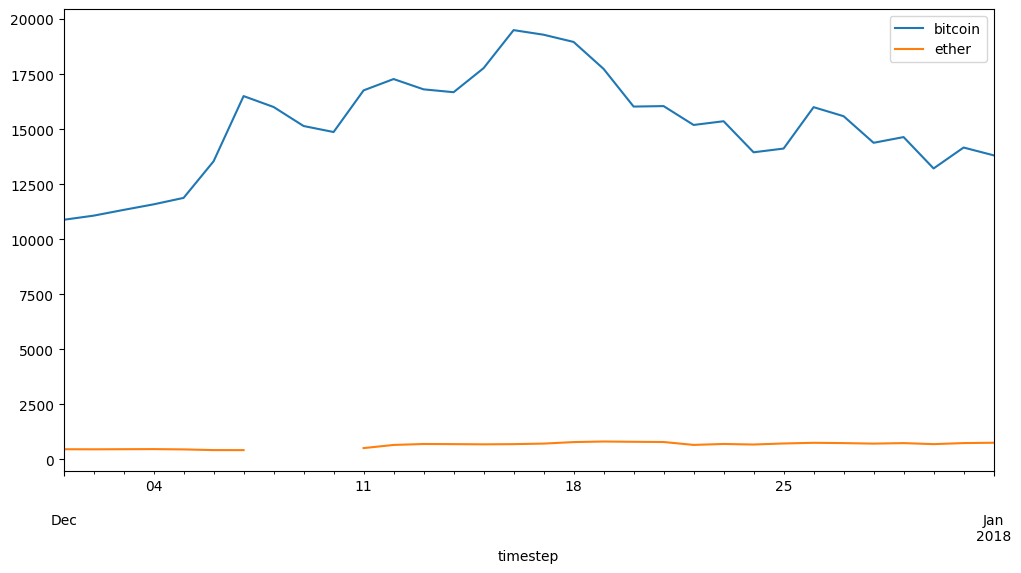

In [94]:
prices.loc['2017-12-01' : '2018-01-01'].plot(figsize = [12, 6])

Oh no, missing data 😱. We'll learn how to deal with that later 😉.

Btw, did you note that fancy indexing '2017-12-01':'2018-01-01' 😏. That's pandas power 💪. We'll learn how to deal with TimeSeries later too.